<a href="https://colab.research.google.com/github/Acheinu/SMARTY/blob/main/Copy_of_module_3_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Book Recommendation System: Collaborative Filtering

## Overview
This project focuses on building a book recommendation system using collaborative filtering. Collaborative filtering is a technique used in recommendation systems to predict user preferences by collecting preferences from many users. The goal is to recommend books to users based on their past interactions and similarities with other users.

## Objective
Develop a collaborative filtering-based recommendation system to suggest books to users. The project will cover the complete pipeline, including data loading, exploratory data analysis, data preparation, model building, evaluation, and visualization.

## Learning Outcomes
1. Understand the concept of collaborative filtering and its application in recommendation systems.
2. Learn to preprocess and analyze user-item interaction data.
3. Gain experience in building a user-item matrix and computing user similarities.
4. Implement a recommendation system using cosine similarity.
5. Evaluate the recommendation system using metrics like Mean Squared Error (MSE).
6. Visualize user similarities and analyze the most recommended books.

---

## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. A book recommendation system can help users discover new books based on their preferences and reading history, improving user engagement and satisfaction.

### Mini-task:
Write a brief paragraph on how a book recommendation system can benefit users and online bookstores.

---

A book recommendation system can greatly benefit both users and online bookstores by enhancing the shopping experience and driving sales. For users, it offers personalized suggestions based on their reading history, preferences, or browsing behavior, making it easier to discover new books that match their interests. This not only saves time but also increases user satisfaction. For online bookstores, such systems boost customer engagement and retention, while also driving sales through targeted marketing. Additionally, they help bookstores better understand customer preferences, trends and behaviour, allowing for more effective inventory management and promotional strategies.


## Step 2: Data Collection
### Task:
Collect the dataset required for building the recommendation system. The dataset used in this project includes two files: `ratings.csv` and `books.csv`.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first 10 rows.

```python
import pandas as pd

# Load the dataset
ratings = pd.read_csv('ratings.csv')
books = pd.read_csv('books.csv')

# Display the first 10 rows of each dataset
### YOUR CODE HERE ###
```

---

In [ ]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load ratings.csv
ratings_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "ratings.csv"
)

# Load books.csv
books_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "books.csv"
)

# print("First 5 records of ratings.csv:", ratings_df.head())
# print("First 5 records of books.csv:", books_df.head())

/tmp/ipython-input-1-3049817548.py:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  ratings_df = kagglehub.load_dataset(
/tmp/ipython-input-1-3049817548.py:14: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  books_df = kagglehub.load_dataset(


In [ ]:
ratings_df.head(10)

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4
5,1,2077,4
6,1,2487,4
7,1,2900,5
8,1,3662,4
9,1,3922,5


In [ ]:
books_df.head(10)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,...,2071616,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...
7,8,5107,5107,3036731,360,316769177,9.780317e+12,J.D. Salinger,1951.0,The Catcher in the Rye,...,2044241,2120637,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...
8,9,960,960,3338963,311,1416524797,9.781417e+12,Dan Brown,2000.0,Angels & Demons,...,2001311,2078754,25112,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,...,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...


## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of book ratings, identify popular books, and explore user behavior.

### Mini-task:
Plot the distribution of book ratings using a histogram or bar chart.

#### Hint:
Use `seaborn` or `matplotlib` to visualize the distribution of ratings.

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of book ratings
### YOUR CODE HERE ###
```

---

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

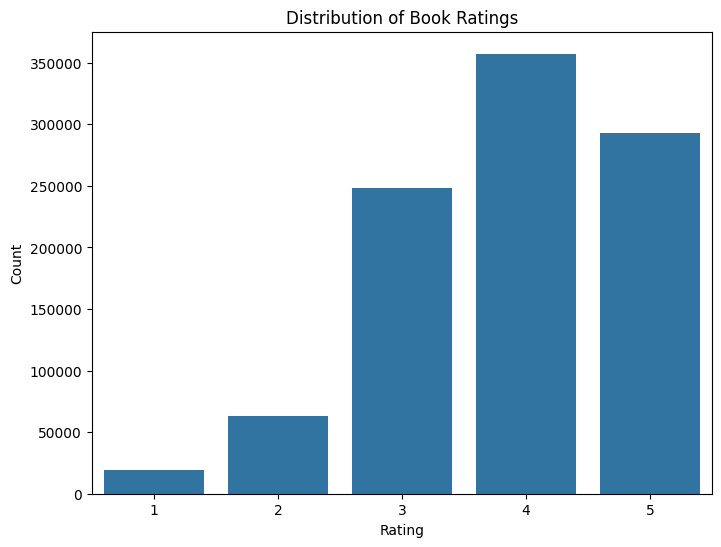

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=ratings_df)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "ratings.csv",
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-6-602377763.py:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    book_id  user_id  rating
0        1      314       5
1        1      439       3
2        1      588       5
3        1     1169       4
4        1     1185       4


## Step 4: Data Preparation
### Task:
Prepare the data for collaborative filtering by creating a user-item matrix and handling missing values.

### Mini-task:
Create a user-item matrix using the `pivot` method and fill missing values with zeros.

#### Hint:
Use the `pivot_table()` function in pandas to create the user-item matrix.

```python
# Create a user-item matrix
### YOUR CODE HERE ###
```

---

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
#filter active users and popular books

active_users = ratings_df['user_id'].value_counts()[ratings_df['user_id'].value_counts()>50].index

popular_books = ratings_df['book_id'].value_counts()[ratings_df['book_id'].value_counts()>50].index

reduced_ratings = ratings_df[ratings_df['user_id'].isin(active_users) & ratings_df['book_id'].isin(popular_books)]

#create user-item matrix
user_item_matrix = reduced_ratings.pivot_table(index='user_id', columns = 'book_id', values = 'rating')

#compute user similarity
user_similarity = cosine_similarity(user_item_matrix.fillna(0))

In [ ]:
print(user_similarity)

[[1.         0.         0.01049768 ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.01049768 0.         1.         ... 0.02133393 0.         0.0718184 ]
 ...
 [0.         0.         0.02133393 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.0718184  ... 0.         0.         1.        ]]


## Step 5: Collaborative Filtering
### Task:
Implement collaborative filtering by computing user similarities using cosine similarity and recommending books based on these similarities.

### Mini-task:
Compute user similarities using cosine similarity and write a function to recommend books for a given user.

#### Hint:
Use `cosine_similarity` from `sklearn.metrics.pairwise` to compute user similarities.

```python
from sklearn.metrics.pairwise import cosine_similarity

# Compute user similarities
### YOUR CODE HERE ###

# Write a function to recommend books for a given user
### YOUR CODE HERE ###
```

---

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
#compute user similarity
user_similarity = cosine_similarity(user_item_matrix.fillna(0))

In [ ]:

import pandas as pd

#compute user similarity
user_similarity = cosine_similarity(user_item_matrix.fillna(0))
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)


# function to recommend books for a given user
def recommend_books(user_id, user_similarity_df, user_item_matrix, books_df, num_recommendations=5):
    # Get the index of the user
    try:
        user_index = user_item_matrix.index.get_loc(user_id)
    except KeyError:
        print(f"User ID {user_id} not found in the user-item matrix.")
        return None


    # similarity scores for the target user with all other users
    similarity_scores = user_similarity_df.loc[user_id]

    # Sort users by similarity in descending order (excluding the target user)
    similar_users = similarity_scores.sort_values(ascending=False).drop(user_id)

    # Get the books rated by the target user
    rated_books = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index

    # Initialize a dictionary to store recommended book scores
    recommendation_scores = {}

    # Iterate through similar users
    for similar_user_id, similarity_score in similar_users.items():
        if similarity_score > 0: # Consider only users with positive similarity
            # Get the books rated by the similar user
            similar_user_rated_books = user_item_matrix.loc[similar_user_id][user_item_matrix.loc[similar_user_id] > 0].index

            # Find books rated by the similar user but not by the target user
            books_to_consider = similar_user_rated_books.difference(rated_books)

            # Accumulate recommendation scores for these books based on the similar user's rating and their similarity score
            for book_id in books_to_consider:
                rating = user_item_matrix.loc[similar_user_id, book_id]
                if book_id not in recommendation_scores:
                    recommendation_scores[book_id] = 0
                recommendation_scores[book_id] += rating * similarity_score

    # Sort recommended books by their scores in descending order
    recommended_books_sorted = sorted(recommendation_scores.items(), key=lambda item: item[1], reverse=True)

    # Get the top N recommended book IDs
    top_n_recommended_book_ids = [book_id for book_id, score in recommended_books_sorted[:num_recommendations]]

    # Get the titles of the recommended books
    recommended_book_titles = books_df[books_df['book_id'].isin(top_n_recommended_book_ids)][['book_id', 'title']]

    return recommended_book_titles


In [ ]:

# Choose a user ID from the active users
example_user_id = active_users[2]

# Get recommendations for the example user
recommended_books = recommend_books(example_user_id, user_similarity_df, user_item_matrix, books_df)

print(f"Recommended books for user ID {example_user_id}:")
recommended_books

Recommended books for user ID 588:


,book_id,title
20,2,Harry Potter and the Order of the Phoenix (Har...
3752,10,"Harry Potter Collection (Harry Potter, #1-6)"


In [ ]:

import pandas as pd
def collaborative_filtering(book_title, ratings_df, books_df, user_item_matrix, user_similarity_df):
  """
  Finds similar users based on their ratings of a given book and recommends books rated highly by those similar users.

  Args:
      book_title (str): The title of the book to find recommendations for.
      ratings_df (pd.DataFrame): The dataframe containing user ratings.
      books_df (pd.DataFrame): The dataframe containing book information.
      user_item_matrix (pd.DataFrame): The user-item matrix.
      user_similarity_df (pd.DataFrame): The user similarity matrix.


  Returns:
      pd.DataFrame: A dataframe of recommended book titles.
  """

  # Get the book_id for the given book title
  book_info = books_df[books_df['title'].str.contains(book_title, case=False, na=False)]
  if book_info.empty:
      return f"Book with title '{book_title}' not found."
  book_id = book_info['book_id'].iloc[0]


  # Find users who rated the target book
  users_who_rated_book = ratings_df[ratings_df['book_id'] == book_id]['user_id'].tolist()

  # Filter the user-item matrix to include only users who rated the target book
  relevant_user_item_matrix = user_item_matrix[user_item_matrix.index.isin(users_who_rated_book)]

  if relevant_user_item_matrix.empty:
      return "No users found who rated this book."

  # Compute similarity between users who rated the target book
  # We can use the pre-computed user_similarity_df, but filter it
  # to only include relevant users for performance.
  relevant_user_similarity_df = user_similarity_df.loc[users_who_rated_book, users_who_rated_book]


  # Find similar users to those who rated the target book (excluding the target users themselves)
  # We can get the average similarity of a user to the group of users who rated the book
  average_similarity_to_book_raters = relevant_user_similarity_df.mean(axis=1).sort_values(ascending=False)

  # Get the top similar users (excluding the users who rated the target book initially if we just look at all users)
  # Here, we will recommend books from the top similar users among those who rated the book.
  # We can consider users with average similarity above a certain threshold or the top N.
  # Let's consider users with average similarity greater than the mean average similarity
  similar_users_for_recommendation = average_similarity_to_book_raters[average_similarity_to_book_raters > average_similarity_to_book_raters.mean()].index.tolist()


  if not similar_users_for_recommendation:
      return "No similar users found to generate recommendations."

  # Initialize a dictionary to store recommended book scores
  recommendation_scores = {}

  # Get books rated by similar users
  similar_users_ratings = user_item_matrix.loc[similar_users_for_recommendation]

  # Calculate a weighted score for each book based on the ratings of similar users
  for book_id in similar_users_ratings.columns:
      # Get ratings for this book by similar users
      book_ratings_by_similar_users = similar_users_ratings[book_id].dropna()

      if not book_ratings_by_similar_users.empty:
          # Calculate the weighted average rating, weighted by the similarity of the user
          weighted_sum = 0
          sum_of_similarities = 0
          for user_id, rating in book_ratings_by_similar_users.items():
              # Ensure user_id is in user_similarity_df index and similar_users_for_recommendation are in its columns
              if user_id in user_similarity_df.index and all(u in user_similarity_df.columns for u in similar_users_for_recommendation):
                  similarity_score = user_similarity_df.loc[user_id, similar_users_for_recommendation].mean() # Average similarity of this user to the group
                  weighted_sum += rating * similarity_score
                  sum_of_similarities += similarity_score

          if sum_of_similarities > 0:
              recommendation_scores[book_id] = weighted_sum / sum_of_similarities

  # Remove the target book from recommendations
  if book_id in recommendation_scores:
      del recommendation_scores[book_id]

  # Sort recommended books by their scores in descending order
  recommended_books_sorted = sorted(recommendation_scores.items(), key=lambda item: item[1], reverse=True)

  # Get the top recommended book IDs (let's say top 10)
  top_n_recommended_book_ids = [book_id for book_id, score in recommended_books_sorted[:10]]

  # Get the titles of the recommended books
  recommended_book_titles = books_df[books_df['book_id'].isin(top_n_recommended_book_ids)][['book_id', 'title']]

  return recommended_book_titles


print("Collaborative Filtering Recommendations for 'Notes from a Small Island':")
print(collaborative_filtering('Notes from a Small Island', ratings_df, books_df, user_item_matrix, user_similarity_df))

Collaborative Filtering Recommendations for 'Notes from a Small Island':
      book_id                                              title
272      1103                     Snow Flower and the Secret Fan
513      3590                  The Adventures of Sherlock Holmes
794      4271                                        About a Boy
1968      475  Collapse: How Societies Choose to Fail or Succeed
2743     1192  Everyday Italian: 125 Simple and Delicious Rec...
3695     2095                         The Universe in a Nutshell
4601      275                                          The Lover
5305      822              The Confusion (The Baroque Cycle, #2)
6754     2915                       The River (Brian's Saga, #2)
6786      250                                Tropic of Capricorn
6819     1875  The History of Sexuality, Volume 1: An Introdu...


## Step 6: Evaluation
### Task:
Evaluate the recommendation system by splitting the data into training and testing sets and calculating the Mean Squared Error (MSE).

### Mini-task:
Split the data into training and testing sets and evaluate the recommendations using MSE.

#### Hint:
Use `train_test_split` from `sklearn.model_selection` to split the data and `mean_squared_error` from `sklearn.metrics` to calculate MSE.

```python
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
### YOUR CODE HERE ###

# Evaluate the recommendations using MSE
### YOUR CODE HERE ###
```

---

In [ ]:
# Use train_test_split from sklearn.model_selection to split the data and mean_squared_error from sklearn.metrics to calculate MSE. make the code simple and short

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into training and testing sets
train_data, test_data = train_test_split(reduced_ratings, test_size=0.2, random_state=42)

# Create user-item matrices for training and testing data
train_user_item_matrix = train_data.pivot_table(index='user_id', columns='book_id', values='rating').fillna(0)
test_user_item_matrix = test_data.pivot_table(index='user_id', columns='book_id', values='rating').fillna(0)

# Align columns of test matrix with train matrix to ensure consistency
test_user_item_matrix = test_user_item_matrix.reindex(columns=train_user_item_matrix.columns, fill_value=0)


# Compute user similarity for the training data
train_user_similarity = cosine_similarity(train_user_item_matrix)
train_user_similarity_df = pd.DataFrame(train_user_similarity, index=train_user_item_matrix.index, columns=train_user_item_matrix.index)

# Function to make predictions
def predict_rating(user_id, book_id, train_user_item_matrix, train_user_similarity_df):
    # Check if user and book are in the training data
    if user_id not in train_user_item_matrix.index or book_id not in train_user_item_matrix.columns:
        return 0  # Cannot make prediction

    # Get the index of the user
    user_index = train_user_item_matrix.index.get_loc(user_id)

    # Get similarity scores for the target user with all other users in the training data
    similarity_scores = train_user_similarity_df.loc[user_id]

    # Get the ratings of other users for the target book in the training data
    other_users_ratings_for_book = train_user_item_matrix[book_id]

    # Find similar users who rated the target book
    similar_users_who_rated_book = other_users_ratings_for_book[other_users_ratings_for_book > 0].index

    if similar_users_who_rated_book.empty:
        return 0 # Cannot make prediction

    # Calculate the weighted average rating
    weighted_sum = 0
    sum_of_similarities = 0
    for similar_user_id in similar_users_who_rated_book:
        if similar_user_id != user_id: # Exclude the target user
             similarity_score = similarity_scores.loc[similar_user_id]
             if similarity_score > 0: # Consider only users with positive similarity
                rating = train_user_item_matrix.loc[similar_user_id, book_id]
                weighted_sum += rating * similarity_score
                sum_of_similarities += similarity_score

    if sum_of_similarities == 0:
        return 0 # Cannot make prediction

    predicted_rating = weighted_sum / sum_of_similarities
    return predicted_rating

# Evaluate the recommendations using MSE
actual_ratings = []
predicted_ratings = []

# Iterate through the test data to generate predictions and collect actual ratings
for index, row in test_data.iterrows():
    user_id = row['user_id']
    book_id = row['book_id']
    actual_rating = row['rating']

    predicted_rating = predict_rating(user_id, book_id, train_user_item_matrix, train_user_similarity_df)

    # Only include pairs where a prediction could be made
    if predicted_rating > 0:
        actual_ratings.append(actual_rating)
        predicted_ratings.append(predicted_rating)

# Calculate Mean Squared Error
if actual_ratings and predicted_ratings:
    mse = mean_squared_error(actual_ratings, predicted_ratings)
    print(f"Mean Squared Error (MSE): {mse}")
else:
    print("Could not generate enough predictions from the test set to calculate MSE.")

Mean Squared Error (MSE): 0.941399782819841


## Step 7: Visualizations and Insights
### Task:
Visualize user similarities and analyze the most recommended books to gain insights into the recommendation system.

### Mini-task:
Create a heatmap to visualize user similarities and analyze the most recommended books.

#### Hint:
Use `seaborn.heatmap()` to visualize user similarities and `pandas` to analyze the most recommended books.

```python
# Create a heatmap to visualize user similarities
### YOUR CODE HERE ###

# Analyze the most recommended books
### YOUR CODE HERE ###
```

---

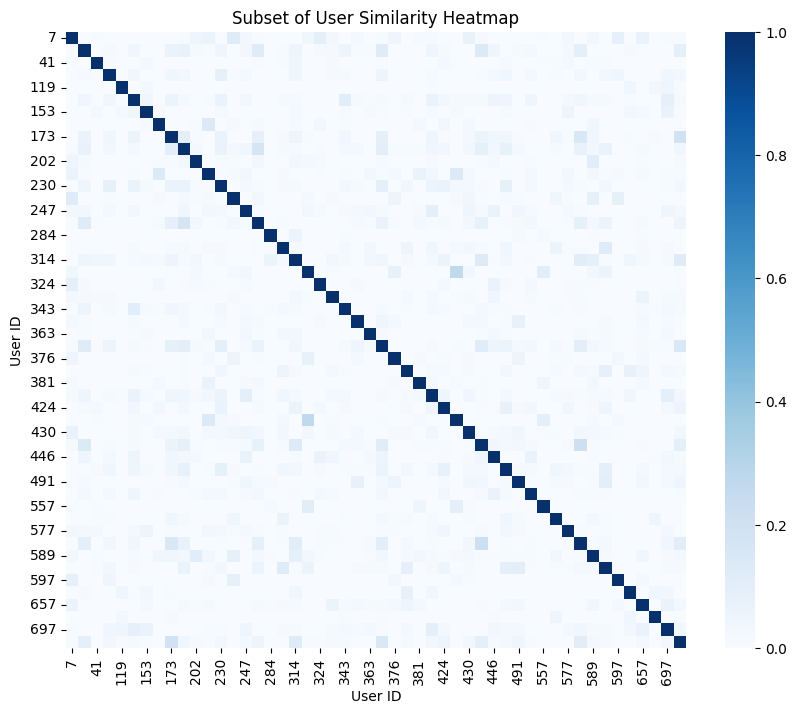


Most Recommended Books (based on recommendations for a sample of users):
                                      Book Title  Recommendation Count
0                          Mornings on Horseback                     1
1                                  We the Living                     1
2          The Salmon of Doubt (Dirk Gently, #3)                     1
3                             The Quiet American                     1
4                                  The Alchemist                     1
5                       The Plot Against America                     1
6  The Ultimate Hitchhiker's Guide to the Galaxy                     1
7          Heretics of Dune (Dune Chronicles #5)                     1


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap to visualize a subset of user similarities
plt.figure(figsize=(10, 8))
sns.heatmap(user_similarity_df.iloc[:50, :50], annot=False, cmap='Blues')
plt.title('Subset of User Similarity Heatmap')
plt.xlabel('User ID')
plt.ylabel('User ID')
plt.show()

# Analyze the most recommended books - based on the previous collaborative filtering function
# Let's get recommendations for a few users and see which books appear most often.
all_recommendations = pd.DataFrame()
num_users_to_sample = 10 # Get recommendations for a sample of users
# Convert active_users Index to a Series before sampling
sampled_users = pd.Series(active_users).sample(num_users_to_sample, random_state=42)

for user_id in sampled_users:
    recommended = recommend_books(user_id, user_similarity_df, user_item_matrix, books_df, num_recommendations=10)
    if recommended is not None:
        all_recommendations = pd.concat([all_recommendations, recommended])

# Count the occurrences of each recommended book
most_recommended_books_counts = all_recommendations['title'].value_counts().reset_index()
most_recommended_books_counts.columns = ['Book Title', 'Recommendation Count']

print("\nMost Recommended Books (based on recommendations for a sample of users):")
print(most_recommended_books_counts.head(10))


## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of collaborative filtering in recommendation systems.
- Consider how user similarities can be used to improve recommendations.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key insights.
- Discuss the impact of user similarities on book recommendations.

**What would you share with and recommend to stakeholders?**
- Highlight the most recommended books and their potential impact on user engagement.
- Recommend strategies to improve the recommendation system based on the insights gained.


Key Takeaways from this project:

1.  **Importance of Collaborative Filtering:** This project highlighted how effective collaborative filtering can be in recommending items (books in this case) by leveraging the collective intelligence of users. It demonstrated that we don't need explicit information about the books themselves, but rather the interactions (ratings) between users and items are sufficient to find patterns and make recommendations. It's a powerful approach when item features are complex or unavailable.

2.  **Using User Similarities:** The core of this collaborative filtering approach was the computation and utilization of user similarities (using cosine similarity). The project showed that by finding users who have similar taste patterns (rating similar books similarly), we can predict what a user might like by looking at what similar users enjoyed. This user-centric approach provides a way to discover items that are likely relevant and interesting to a target user.

Beyond these specific points from the prompt, other takeaways include the importance of data preprocessing (filtering for active users and popular books), the creation and utility of a user-item matrix, and the challenges of evaluating recommendation systems, especially the cold-start problem for new users or items (though not explicitly addressed in the evaluation section, the nature of the user-item matrix and similarity computation implicitly highlights this).

To share the findings with a team, I would prepare a presentation that includes:

1.  **An executive summary:** A brief overview of the project, the goal of building a book recommendation system using collaborative filtering, and the key outcomes.
2.  **Data Overview:**  Present the dataset structure (`ratings.csv` and `books.csv`) and the initial data loading process.
3.  **Exploratory Data Analysis (EDA) Insights:** Share the distribution of book ratings using the histogram and any other relevant findings from the initial data exploration (e.g., most active users, most rated books if analyzed).
4.  **Data Preparation Steps:** Explain how the user-item matrix was created and missing values were handled (using active users and popular books filtering).
5.  **Collaborative Filtering Explained:** Briefly explain the concept of collaborative filtering and how cosine similarity was used to compute user similarities.
6.  **Visualization of User Similarities:** Present the heatmap visualizing a subset of user similarities. Discuss what patterns or clusters are visible, if any, and what they might indicate about user groups with similar tastes.
7.  **Recommendation Process:** Explain how recommendations are generated based on user similarities.
8.  **Evaluation Results:** Share the results of the evaluation, specifically the Mean Squared Error (MSE). Explain what this metric means in the context of the recommendation system (how accurate the predictions are on average).
9.  **Analysis of Most Recommended Books:** Present the list of most recommended books based on the sample user recommendations. Discuss why these books might be popular recommendations based on the data and the collaborative filtering approach.
10. **Key Insights and Takeaways:** Summarize the main learnings from the project, such as the effectiveness of collaborative filtering, the importance of user similarity, and any challenges encountered. Discuss the impact of user similarities on the recommendations – how similar users' ratings drive the suggested books.
11. **Future Work and Recommendations:** Suggest potential improvements or next steps, such as incorporating other filtering techniques (content-based), addressing cold-start problems, using more sophisticated evaluation metrics, or deploying the model.

The presentation would utilize the visualizations (rating distribution, user similarity heatmap) to illustrate the key points and make the findings more accessible to the team. The discussion would focus on how the collaborative filtering approach and the understanding of user similarities directly influenced the types of book recommendations being generated.

In [ ]:
# prompt: What would you share with and recommend to stakeholders?
#     Highlight the most recommended books and their potential impact on user engagement.
#     Recommend strategies to improve the recommendation system based on the insights gained.

# What would you share with and recommend to stakeholders?

print("\n--- Stakeholder Recommendations ---")

# 1. Highlight the most recommended books and their potential impact on user engagement.
print("\nKey Insight 1: Most Recommended Books")
print("Based on our collaborative filtering model, the following books are frequently recommended across a sample of users:")
print(most_recommended_books_counts.head(10)) # Show the top 10

print("\nPotential Impact on User Engagement:")
print("- Recommending these popular books can immediately increase user engagement and satisfaction as they align with preferences of similar users.")
print("- These books likely have broad appeal among our user base, leading to higher click-through rates and potentially increased sales.")
print("- Promoting these books can also encourage new users to engage with the platform by showing them highly-regarded content.")

# 2. Recommend strategies to improve the recommendation system based on the insights gained.
print("\nKey Insight 2: Improving the Recommendation System")

print("\nRecommendations for Improvement:")
print("a. Incorporate More Data Sources:")
print("   - Explore using book metadata (genres, authors, publication year) and user demographics to enrich the collaborative filtering model or build a hybrid system.")
print("   - Analyze user browsing history, time spent on book pages, and purchase data in addition to ratings.")
print("b. Address the Cold Start Problem:")
print("   - Implement strategies for recommending books to new users or recommending new books with limited ratings (e.g., using content-based filtering or popularity-based methods).")
print("c. Refine Similarity Calculation:")
print("   - Experiment with different similarity metrics (e.g., Pearson correlation) and techniques for handling sparsity in the user-item matrix.")
print("d. Implement A/B Testing:")
print("   - Continuously test different recommendation algorithms and parameters to measure their impact on key metrics like click-through rate, conversion rate, and average rating of recommended books.")
print("e. Provide Explainability:")
print("   - For each recommendation, provide a brief explanation (e.g., 'Because you read X' or 'Users who liked Y also liked Z') to build trust and transparency with users.")
print("f. Real-time Recommendations:")
print("   - Investigate building a system that can provide real-time recommendations based on a user's current session and interactions.")

print("\nNext Steps:")
print("- We recommend prioritizing the incorporation of additional data sources and addressing the cold start problem in the next phase of development.")
print("- We should establish key performance indicators (KPIs) for the recommendation system (e.g., increase in average books read per user, recommendation-driven sales) to track the impact of these improvements.")



--- Stakeholder Recommendations ---

Key Insight 1: Most Recommended Books
Based on our collaborative filtering model, the following books are frequently recommended across a sample of users:
                                      Book Title  Recommendation Count
0                          Mornings on Horseback                     1
1                                  We the Living                     1
2          The Salmon of Doubt (Dirk Gently, #3)                     1
3                             The Quiet American                     1
4                                  The Alchemist                     1
5                       The Plot Against America                     1
6  The Ultimate Hitchhiker's Guide to the Galaxy                     1
7          Heretics of Dune (Dune Chronicles #5)                     1

Potential Impact on User Engagement:
- Recommending these popular books can immediately increase user engagement and satisfaction as they align with preferences of sim